In [1]:
library(dplyr)
library(Hmisc)
library(MESS)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'Hmisc' was built under R version 3.5.2"Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: geepack
Loading required package: geeM
Loading required package: Matrix


In [2]:
if(!require(fpc)) install.packages("fpc")
if(!require(dbscan)) install.packages("dbscan")
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")

Loading required package: fpc
Loading required package: dbscan

Attaching package: 'dbscan'

The following object is masked from 'package:fpc':

    dbscan

Loading required package: devtools
Warning message:
"package 'devtools' was built under R version 3.5.2"Skipping install of 'factoextra' from a github remote, the SHA1 (1012e1b5) has not changed since last install.
  Use `force = TRUE` to force installation


In [3]:
library(data.table)


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



In [8]:
library(NbClust)

In [9]:
f9 <- read.csv(file="C:/Users/Chen/Project/data/f9.csv")

In [10]:
head(f9)
str(f9)

Date,ID.OB,Month_Yr,Address,Street,Block,Latitude,Longitude,Year,Month,...,HZ,RA,RA45,TS,TSRA,VCTS,pre45_1_2,pre45_1,pre45_05,pre45_052
2007-05-29,1,2007-05,"1100 Roosevelt Road, Chicago, IL 60608, USA",W ROOSEVELT,11,41.86711,-87.65422,2007,5,...,1,0,15.77226,0,0,0,1,1,1,1
2007-05-29,2,2007-05,"1100 South Peoria Street, Chicago, IL 60608, USA",S PEORIA ST,11,41.86229,-87.64886,2007,5,...,1,0,15.77226,0,0,0,1,1,1,1
2007-05-29,3,2007-05,"1100 West Chicago Avenue, Chicago, IL 60642, USA",W CHICAGO,11,41.89628,-87.65523,2007,5,...,1,0,15.77226,0,0,0,1,1,1,1
2007-05-29,4,2007-05,"1500 North Long Avenue, Chicago, IL 60651, USA",N LONG AVE,15,41.90765,-87.76089,2007,5,...,1,0,15.77226,0,0,0,1,1,1,1
2007-05-29,5,2007-05,"1500 West Webster Avenue, Chicago, IL 60614, USA",W WEBSTER AVE,15,41.92160,-87.66645,2007,5,...,1,0,15.77226,0,0,0,1,1,1,1
2007-05-29,6,2007-05,"1700 West 95th Street, Chicago, IL 60643, USA",W 95TH ST,17,41.72085,-87.66601,2007,5,...,1,0,15.77226,0,0,0,1,1,1,1


'data.frame':	4616 obs. of  68 variables:
 $ Date                  : Factor w/ 95 levels "2007-05-29","2007-06-05",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ID.OB                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Month_Yr              : Factor w/ 20 levels "2007-05","2007-06",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address               : Factor w/ 138 levels "1000 East 67th Street, Chicago, IL 60637, USA",..: 6 8 10 14 16 19 26 28 29 32 ...
 $ Street                : Factor w/ 128 levels "  W ARMITAGE AVENUE",..: 124 75 108 27 128 103 42 18 88 102 ...
 $ Block                 : int  11 11 11 15 15 17 21 22 22 22 ...
 $ Latitude              : num  41.9 41.9 41.9 41.9 41.9 ...
 $ Longitude             : num  -87.7 -87.6 -87.7 -87.8 -87.7 ...
 $ Year                  : int  2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...
 $ Month                 : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Season_code_1         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Season_code_2         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Season_cod

In [11]:
colnames(f9)

[1] "Date"                   "ID.OB"                  "Month_Yr"              
 [4] "Address"                "Street"                 "Block"                 
 [7] "Latitude"               "Longitude"              "Year"                  
[10] "Month"                  "Season_code_1"          "Season_code_2"         
[13] "Season_code_3"          "TrapM"                  "CULEX_ERRATICUS"       
[16] "CULEX_PIPIENS"          "CULEX_PIPIENS_RESTUANS" "CULEX_RESTUANS"        
[19] "CULEX_SALINARIUS"       "CULEX_TARSALIS"         "CULEX_TERRITANS"       
[22] "ParasiticIn."           "Influenza."             "WnvPresentB"           
[25] "Tmax2"                  "Tmin2"                  "Tavg2"                 
[28] "WetBulb2"               "Heat2"                  "PrecipTotal2"          
[31] "StnPressure2"           "ResultDir2"             "AvgSpeed2"             
[34] "DZ2"                    "FG2"                    "HZ2"                   
[37] "RA2"                    "RA45.2"                 "BR2"                   
[40] "TS2"                    "TSRA2"                  "VCTS2"                 
[43] "Tmax"                   "Tmin"                   "Tavg"                  
[46] "Depart"                 "DewPoint"               "Heat"                  
[49] "Cool"                   "Sunrise"                "Sunset"                
[52] "PrecipTotal"            "ResultSpeed"            "ResultDir"             
[55] "AvgSpeed"               "BR"                     "DZ"                    
[58] "FG"                     "HZ"                     "RA"                    
[61] "RA45"                   "TS"                     "TSRA"                  
[64] "VCTS"                   "pre45_1_2"              "pre45_1"               
[67] "pre45_05"               "pre45_052"

In [12]:
var<-c('ID.OB','Latitude', 'Longitude','TrapM' )
tc<-f9[var]
dim(tc)

[1] 4616    4

In [13]:
head(tc)
str(tc)

ID.OB,Latitude,Longitude,TrapM
1,41.86711,-87.65422,48
2,41.86229,-87.64886,91
3,41.89628,-87.65523,49
4,41.90765,-87.76089,153
5,41.92160,-87.66645,45
6,41.72085,-87.66601,94


'data.frame':	4616 obs. of  4 variables:
 $ ID.OB    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Latitude : num  41.9 41.9 41.9 41.9 41.9 ...
 $ Longitude: num  -87.7 -87.6 -87.7 -87.8 -87.7 ...
 $ TrapM    : int  48 91 49 153 45 94 50 54 86 96 ...


In [14]:
describe(tc)

tc 

 4  Variables      4616  Observations
--------------------------------------------------------------------------------
ID.OB 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4616        0     4616        1     2308     1539    231.8    462.5 
     .25      .50      .75      .90      .95 
  1154.8   2308.5   3462.2   4154.5   4385.2 

lowest :    1    2    3    4    5, highest: 4612 4613 4614 4615 4616
--------------------------------------------------------------------------------
Latitude 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4616        0      138        1    41.85   0.1209    41.68    41.70 
     .25      .50      .75      .90      .95 
   41.75    41.86    41.94    41.99    41.99 

lowest : 41.64461 41.65911 41.66201 41.67341 41.67862
highest: 42.00831 42.00988 42.01041 42.01160 42.01743
--------------------------------------------------------------------------------
Longitude 
       n  missing distinct     

In [18]:
dtc = tc %>% distinct(Longitude)

In [19]:
dim(dtc)

[1] 138   1

In [27]:
tcu <- tc[!duplicated(tc$Longitude), ]

In [29]:
head(tcu)
dim(tcu)

ID.OB,Latitude,Longitude,TrapM
1,41.86711,-87.65422,48
2,41.86229,-87.64886,91
3,41.89628,-87.65523,49
4,41.90765,-87.76089,153
5,41.92160,-87.66645,45
6,41.72085,-87.66601,94


[1] 138   4

Calculation of the optimal number of clusters

Warning message in pf(beale, pp, df2):
"NaNs produced"

[1] "Frey index : No clustering structure in this data set"
*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


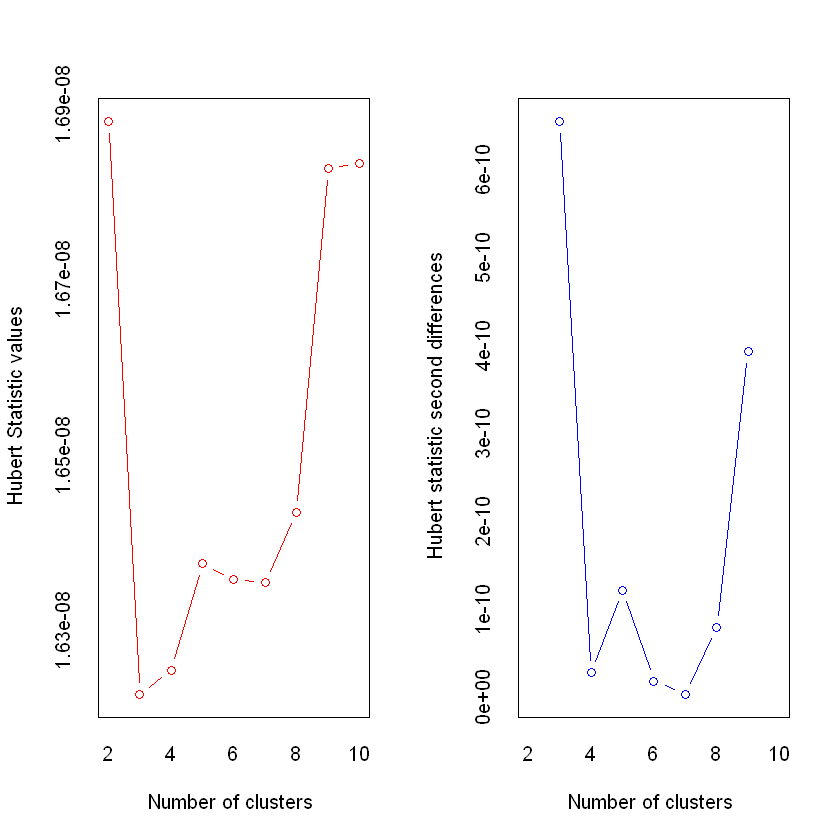

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 1 proposed 2 as the best number of clusters 
* 14 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 1 proposed 8 as the best number of clusters 
* 2 proposed 9 as the best number of clusters 
* 2 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
***************************

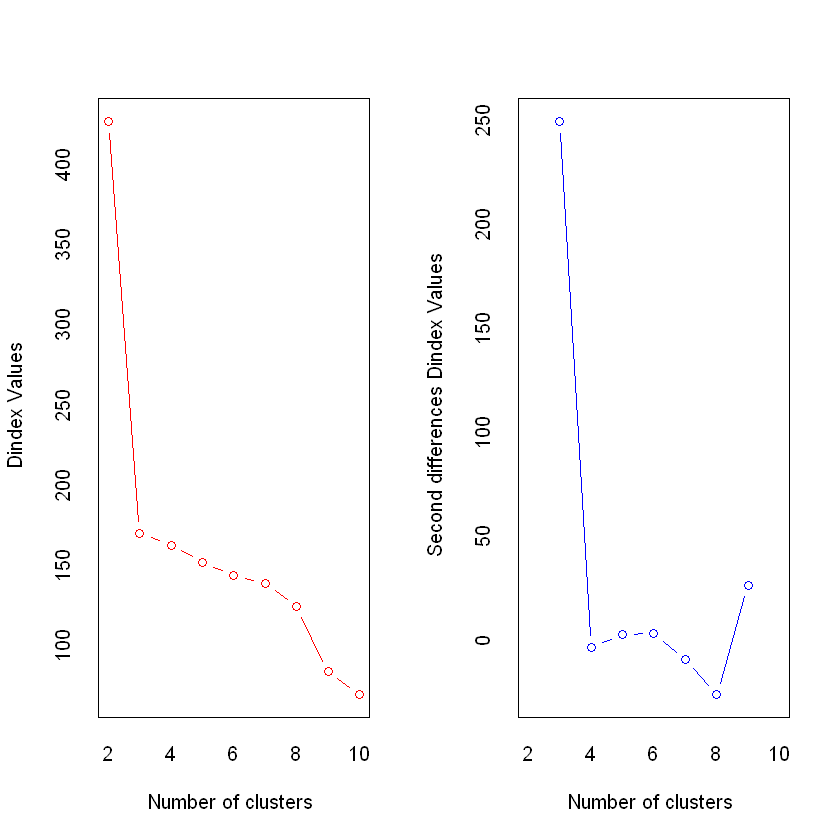

In [30]:
res <- NbClust(tcu, distance = "euclidean", min.nc=2, max.nc=10, method = "complete")

In [31]:
#install.packages("dbscan")
library("fpc")
library("dbscan")


### create a dbscan cluster
dbscan_mod <- dbscan(dtc,eps=0.5, minPts = 2 )

In [32]:
summary(dbscan_mod$cluster)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

In [33]:
table(dbscan_mod$cluster)


  1 
138 

In [34]:
print(dbscan_mod$cluster)

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1



 1  2  3  4  5  6  7  8  9 10 
14 17 11 12 10 15  3 12 16 26 

Latitude,Longitude,cluster
41.75798,-87.60078,1
41.97363,-87.69728,2
41.81757,-87.66307,3
41.89209,-87.64573,4
41.70415,-87.54438,5
41.72096,-87.68220,6
41.67019,-87.60107,7
41.78394,-87.74704,8
41.88810,-87.71884,9
41.96793,-87.79765,10


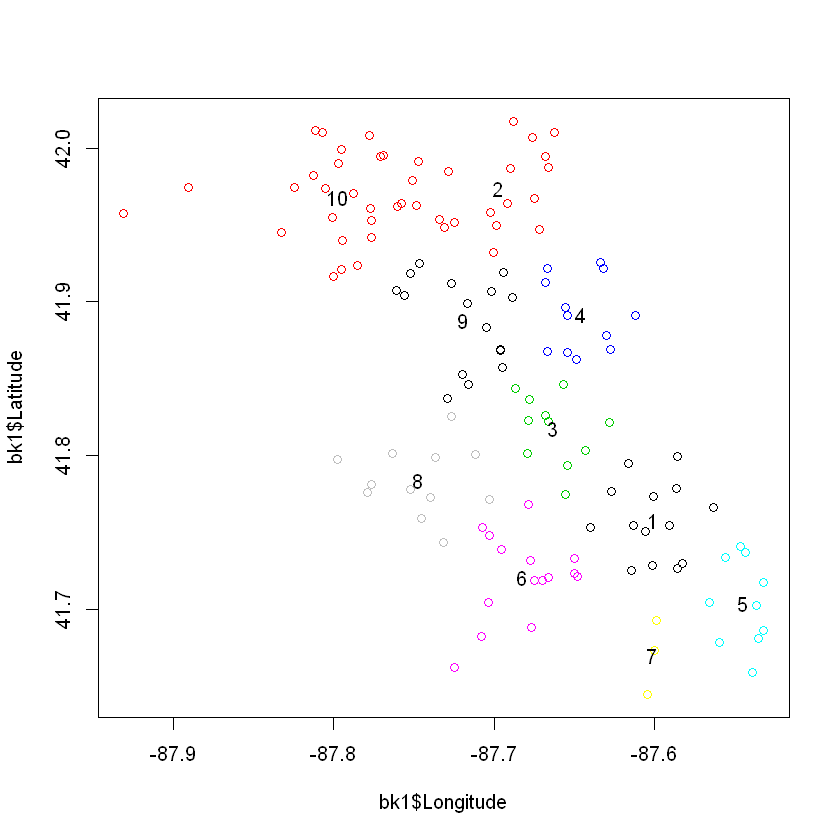

In [52]:
## Kmeans model - the optimal is between 11 and 14...I prefered 14 :-)
model.km <- kmeans(bk1[,c("Latitude","Longitude")], centers=10)
table(model.km$cluster)
plot(bk1$Latitude ~ bk1$Longitude, col=model.km$cluster)
cnt <- data.frame(model.km$centers)
cnt$cluster <- 1:nrow(cnt)
text(cnt$Latitude ~ cnt$Longitude,labels = cnt$cluster)

## centers:
cnt <- data.frame(model.km$centers)
cnt$cluster <- 1:nrow(cnt)
cnt


 1  2  3  4  5  6  7  8  9 10 
24 13  3 17 10 11 16 14 19 11 

Latitude,Longitude,cluster
41.85076,-87.66733,1
41.98528,-87.79954,2
41.97499,-87.89487,3
41.72605,-87.67813,4
41.68407,-87.56019,5
41.91911,-87.76469,6
41.75435,-87.58852,7
41.78629,-87.74544,8
41.95434,-87.67751,9
41.96469,-87.74876,10


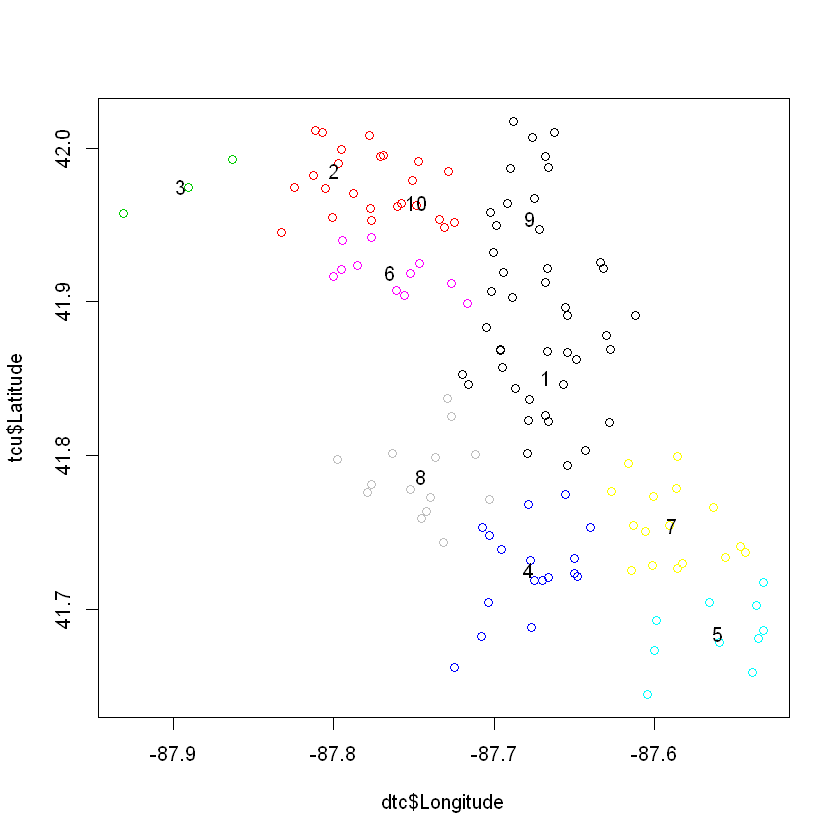

In [35]:
## Kmeans model - the optimal is between 11 and 14...I prefered 14 :-)
model.km <- kmeans(tcu[,c("Latitude","Longitude")], centers=10)
table(model.km$cluster)
plot(tcu$Latitude ~ dtc$Longitude, col=model.km$cluster)
cnt <- data.frame(model.km$centers)
cnt$cluster <- 1:nrow(cnt)
text(cnt$Latitude ~ cnt$Longitude,labels = cnt$cluster)

## centers:
cnt <- data.frame(model.km$centers)
cnt$cluster <- 1:nrow(cnt)
cnt

In [40]:
#out <- cbind(tcu, clusterNum = model.km$cluster)
dim(out)
head(out)

[1] 138   5

ID.OB,Latitude,Longitude,TrapM,clusterNum
1,41.86711,-87.65422,48,1
2,41.86229,-87.64886,91,1
3,41.89628,-87.65523,49,1
4,41.90765,-87.76089,153,6
5,41.92160,-87.66645,45,9
6,41.72085,-87.66601,94,4


In [39]:
print(out)
dim(out)

     ID.OB Latitude Longitude TrapM clusterNum
1        1 41.86711 -87.65422    48          1
2        2 41.86229 -87.64886    91          1
3        3 41.89628 -87.65523    49          1
4        4 41.90765 -87.76089   153          6
5        5 41.92160 -87.66645    45          9
6        6 41.72085 -87.66601    94          4
7        7 41.91934 -87.69426    50          9
8        8 41.92197 -87.63209    54          9
9        9 41.68832 -87.67671    86          4
10      10 41.73192 -87.67751    96          4
11      11 41.89112 -87.65449    46          1
12      12 41.95469 -87.80099     2          2
13      13 41.99499 -87.76928     7          2
14      14 41.99913 -87.79559   143          2
15      15 42.01743 -87.68777   148          9
16      16 41.97409 -87.82481    15          2
17      17 41.73298 -87.64964   159          4
18      18 41.89113 -87.61156   129          1
20      20 41.86922 -87.62756    92          1
22      22 41.90664 -87.70143    33          9
24      24 41

[1] 138   5

In [38]:
print(model.km)

K-means clustering with 10 clusters of sizes 24, 13, 3, 17, 10, 11, 16, 14, 19, 11

Cluster means:
   Latitude Longitude
1  41.85076 -87.66733
2  41.98528 -87.79954
3  41.97499 -87.89487
4  41.72605 -87.67813
5  41.68407 -87.56019
6  41.91911 -87.76469
7  41.75435 -87.58852
8  41.78629 -87.74544
9  41.95434 -87.67751
10 41.96469 -87.74876

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    1    1    6    9    4    9    9    4    4    1    2    2    2    9    2 
  17   18   20   22   24   27   28   33   35   36   37   38   39   40   42   43 
   4    1    1    9    9    9    6    1    9    4    2   10    9   10    9    4 
  44   45   46   47   48   50   51   54   55   56   57   58   59   60   62   67 
   9   10    8   10    9    6    2    2    7    1    4    1    1    4    1    9 
  69   72   74   76   81   86   90   91   94   95  100  104  106  108  111  117 
   1    1    1    1   10   10    2   10    6    2    4    6    9    9   

## Kmeans model - the optimal is between 11 and 14...I prefered 14 :-)
model.km <- kmeans(Spr[,c("Latitude","Longitude")], centers=11)
table(model.km$cluster)
plot(Spr$Latitude ~ Spr$Longitude, col=model.km$cluster)
cnt11 <- data.frame(model.km$centers)
cnt11$cluster <- 1:nrow(cnt11)
text(cnt11$Latitude ~ cnt11$Longitude,labels = cnt11$cluster)

## centers:
cnt11 <- data.frame(model.km$centers)
cnt11$cluster <- 1:nrow(cnt11)
cnt11

In [41]:
write.csv(out, file="C:/Users/Chen/Project/data/Trap_cnt.csv", row.names =F)

In [42]:
write.csv(cnt, file="C:/Users/Chen/Project/data/Tnum_cnt.csv", row.names =F)